In [1]:
import csv
import requests

url = 'https://api.weather.gov/gridpoints/TOP/31,80/forecast'
response = requests.get(url)
data = response.json()
periods = data['properties']['periods']
data_list = []
for period in periods:
    data_dict = {'day': period['name'], 'details': period['detailedForecast'], 'temperature': period['temperature']}
    data_list.append(data_dict)
with open('weather_data.csv', 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['day', 'details', 'temperature'])
    writer.writeheader()
    for data_dict in data_list:
        writer.writerow(data_dict)


Text(0.5, 1.0, 'Temperature Forecast')

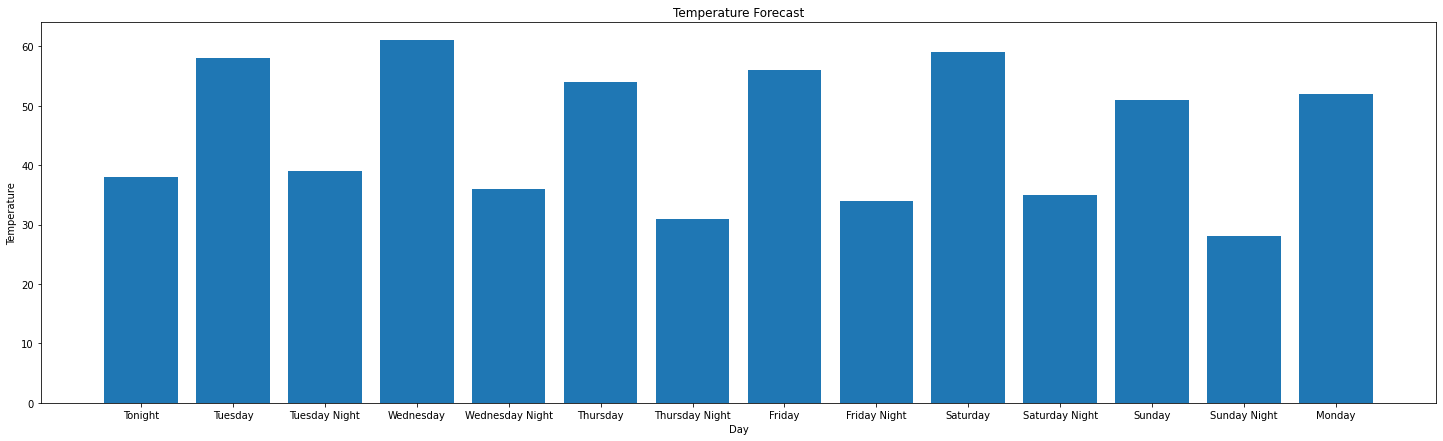

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('weather_data.csv')

# Create a bar graph
fig = plt.figure(figsize = (25,7))
plt.bar(df['day'], df['temperature'])

# Set axis labels and title
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Temperature Forecast')


In [4]:
import requests
# PublicHolidays/{year}/{countryCode} - This endpoint returns a list of public holidays for a year and country. You can specify the year and the country code in the URL, and the API will return a list of public holidays, along with their date, name, and type (e.g., national, local, or observance).
url = "https://date.nager.at/api/v3/PublicHolidays/2023/US"
response = requests.get(url)
data = response.json()

# Prints the name and date of each public holiday
for holiday in data:
    print(holiday["name"], holiday["date"])

New Year's Day 2023-01-02
Martin Luther King, Jr. Day 2023-01-16
Washington's Birthday 2023-02-20
Good Friday 2023-04-07
Good Friday 2023-04-07
Memorial Day 2023-05-29
Juneteenth 2023-06-19
Independence Day 2023-07-04
Labour Day 2023-09-04
Columbus Day 2023-10-09
Veterans Day 2023-11-10
Thanksgiving Day 2023-11-23
Christmas Day 2023-12-25


In [5]:
import requests
# AvailableCountries - This endpoint returns a list of all the countries which the API provides public holiday data for. The API will return a list of country codes, along with the country's name and ISO code.
url = "https://date.nager.at/api/v3/AvailableCountries"
response = requests.get(url)
data = response.json()

# Prints the name and code of each country
for country in data:
    print(country["name"], country["countryCode"])


Andorra AD
Albania AL
Argentina AR
Austria AT
Australia AU
Åland Islands AX
Bosnia and Herzegovina BA
Barbados BB
Belgium BE
Bulgaria BG
Benin BJ
Bolivia BO
Brazil BR
Bahamas BS
Botswana BW
Belarus BY
Belize BZ
Canada CA
Switzerland CH
Chile CL
China CN
Colombia CO
Costa Rica CR
Cuba CU
Cyprus CY
Czechia CZ
Germany DE
Denmark DK
Dominican Republic DO
Ecuador EC
Estonia EE
Egypt EG
Spain ES
Finland FI
Faroe Islands FO
France FR
Gabon GA
United Kingdom GB
Grenada GD
Guernsey GG
Gibraltar GI
Greenland GL
Gambia GM
Greece GR
Guatemala GT
Guyana GY
Honduras HN
Croatia HR
Haiti HT
Hungary HU
Indonesia ID
Ireland IE
Isle of Man IM
Iceland IS
Italy IT
Jersey JE
Jamaica JM
Japan JP
South Korea KR
Liechtenstein LI
Lesotho LS
Lithuania LT
Luxembourg LU
Latvia LV
Morocco MA
Monaco MC
Moldova MD
Montenegro ME
Madagascar MG
North Macedonia MK
Mongolia MN
Montserrat MS
Malta MT
Mexico MX
Mozambique MZ
Namibia NA
Niger NE
Nigeria NG
Nicaragua NI
Netherlands NL
Norway NO
New Zealand NZ
Panama PA
Peru P

In [8]:
import requests
# LongWeekend/{startYear}/{endYear}/{countryCode} - This endpoint returns a list of long weekends for a country, within a given date range. You can specify the start and end years, as well as the country code, in the URL. The API will return a list of long weekends, which are defined as a consecutive series of days off that includes a weekend and a public holiday.
url = "https://date.nager.at/api/v3/LongWeekend/2003/US"
country_code = "US" # Replace with the country code you want to retrieve the long weekends for
response = requests.get(url.format(countryCode=country_code))
data = response.json()

# Prints the start and end dates of each long weekend
for long_weekend in data:
    print(long_weekend["startDate"], long_weekend["endDate"])

2003-01-18 2003-01-20
2003-02-15 2003-02-17
2003-05-24 2003-05-26
2003-07-04 2003-07-06
2003-08-30 2003-09-01
2003-11-08 2003-11-11
2003-11-27 2003-11-30
2003-12-25 2003-12-28


In [6]:
import requests
# NextPublicHolidays/{countryCode} - This endpoint returns a list of the next public holidays for a country. You can specify the country code in the URL, and the API will return a list of the next public holidays, along with their date, name, and type.
url = "https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}"
year = "2023" # Replace with the year you want to retrieve the public holidays for
country_code = "US" # Replace with the country code you want to retrieve the public holidays for
response = requests.get(url.format(year=year, countryCode=country_code))
data = response.json()

# Prints the name and date of each public holiday
for holiday in data:
    print(holiday["name"], holiday["date"])

New Year's Day 2023-01-02
Martin Luther King, Jr. Day 2023-01-16
Washington's Birthday 2023-02-20
Good Friday 2023-04-07
Good Friday 2023-04-07
Memorial Day 2023-05-29
Juneteenth 2023-06-19
Independence Day 2023-07-04
Labour Day 2023-09-04
Columbus Day 2023-10-09
Veterans Day 2023-11-10
Thanksgiving Day 2023-11-23
Christmas Day 2023-12-25


In [7]:
import requests
from datetime import date

url = "https://date.nager.at/api/v3/IsTodayPublicHoliday/us?countyCode=us&offset=0"
country_code = "us" # Replace with the country code you want to check for public holidays
response = requests.get(url.format(countryCode=country_code))
data = response.json()

# Check if today is a public holiday
if data:
    print(f"Today is a public holiday in {country_code}.")
else:
    print(f"Today is not a public holiday in {country_code}.")

JSONDecodeError: [Errno Expecting value] : 0

In [9]:
import requests
from datetime import date
# SchoolHolidays/{year}/{countryCode}/{region} - This endpoint returns a list of school holidays for a year, country, and region. You can specify the year, country code, and region in the URL, and the API will return a list of school holidays, along with their date and name.
url = "https://date.nager.at/api/v3/NextPublicHolidays/{countryCode}"

country_code = "US"

response = requests.get(url.format(countryCode=country_code))
data = response.json()

next_holiday = date.fromisoformat(data[0]["date"])

delta = next_holiday - date.today()
days_until_holiday = delta.days

print(f"The next public holiday in {country_code} is on {next_holiday} ({days_until_holiday} days from today).")

The next public holiday in US is on 2023-04-07 (18 days from today).


In [10]:
import requests
from datetime import date
#NextPublicHolidaysWorldwide - This endpoint (absent of the (countryCode)) is used to find the next date of a national holiday worldwide, therefore there is no need for a countryCode. 
url = "https://date.nager.at/api/v3/NextPublicHolidaysWorldwide"

response = requests.get(url)
data = response.json()

next_holiday = date.fromisoformat(data[0]["date"])

delta = next_holiday - date.today()
days_until_holiday = delta.days

print(f"The next public holiday worldwide is on {next_holiday} ({days_until_holiday} days from today).")


The next public holiday worldwide is on 2023-03-20 (0 days from today).


In [5]:
import csv
import requests

countries = ['US', 'CA', 'MX', 'GB', 'FR', 'DE', 'JP', 'CN', 'AU', 'NZ']
url = 'https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}'

with open('public_holidays.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Country', 'Year', 'Total Holidays'])
    
    for country in countries:
        year = 2023
        response = requests.get(url.format(year=year, countryCode=country))
        holidays = response.json()
        total_holidays = len(holidays)
        writer.writerow([country, year, total_holidays])


# BONUS

In [16]:
# For the graph, I simply increased the size using the figsize function. I changed the size until the names appeared neat on the x axis.
#I did not need a source as I had done this last semester

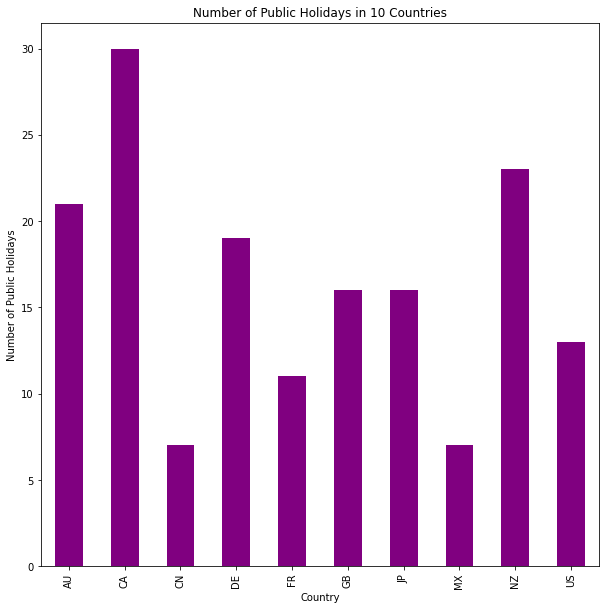

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('public_holidays.csv')
holiday_counts = data.groupby('Country')['Total Holidays'].sum()

holiday_counts.plot(kind='bar', figsize=(10, 10), color='purple')
plt.yticks(range(0, max(holiday_counts)+5, 5))
plt.xlabel('Country')
plt.ylabel('Number of Public Holidays')
plt.title('Number of Public Holidays in 10 Countries')

plt.show()
